# Explore data and understand what factor most affects the median house value in a district 
Data

In [1]:
# Importing the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats
from scipy.stats import ttest_ind
import numpy as np

from scipy.stats import norm
import statistics

In [2]:
# Importing the dataset
house=pd.read_csv('data/housing.csv')


In [3]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
house.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [4]:
house.describe ()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
sample_data=house.sample(n=1000,replace="False")
sample_data.shape



(1000, 10)

In [6]:
data=sample_data
X = data['median_income']
Y = data['median_house_value']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


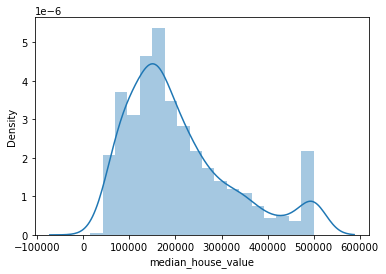

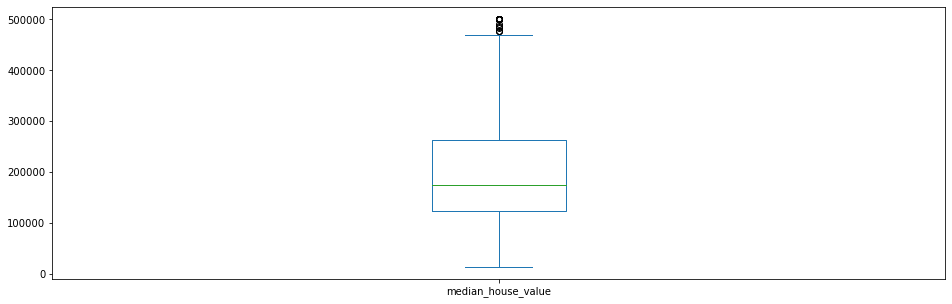

In [10]:
sns.distplot(Y)
plt.show()
Y.plot.box(figsize=(16,5))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


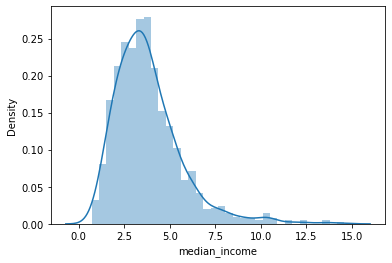

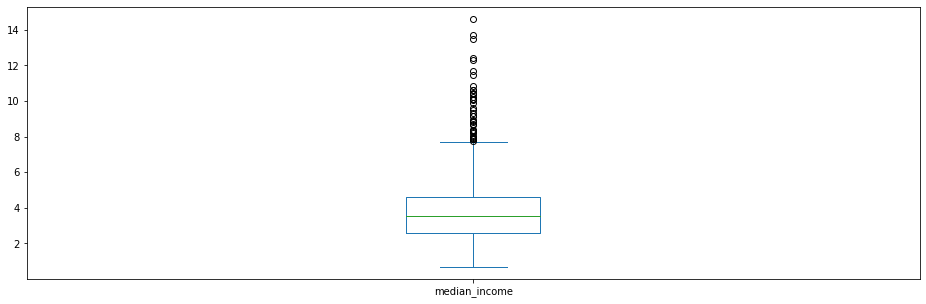

In [11]:
sns.distplot(X)
plt.show()
X.plot.box(figsize=(16,5))
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

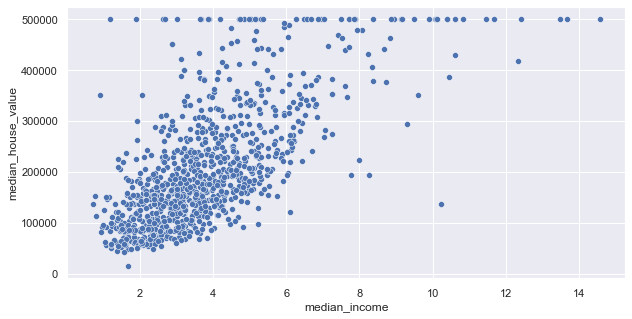

In [12]:
#data=house
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data=data, x="median_income",y="median_house_value")

In [ ]:
# data['median_house_value'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='median_house_value')

In [ ]:
# house.hist()
# plt.xlim([0,100])
# plt.ylim([50,500])
# plt.title("Houses Prices")
# plt.xlabel("Variables")
# plt.ylabel("Frequency")
# plt.show('median_house_value','housing_median_age')

In [ ]:
# house.plot(kind='bar')
# # plt.ylabel('Frequency')
# # plt.xlabel('median_house_value')
# plt.title('Prices')

# plt.show()

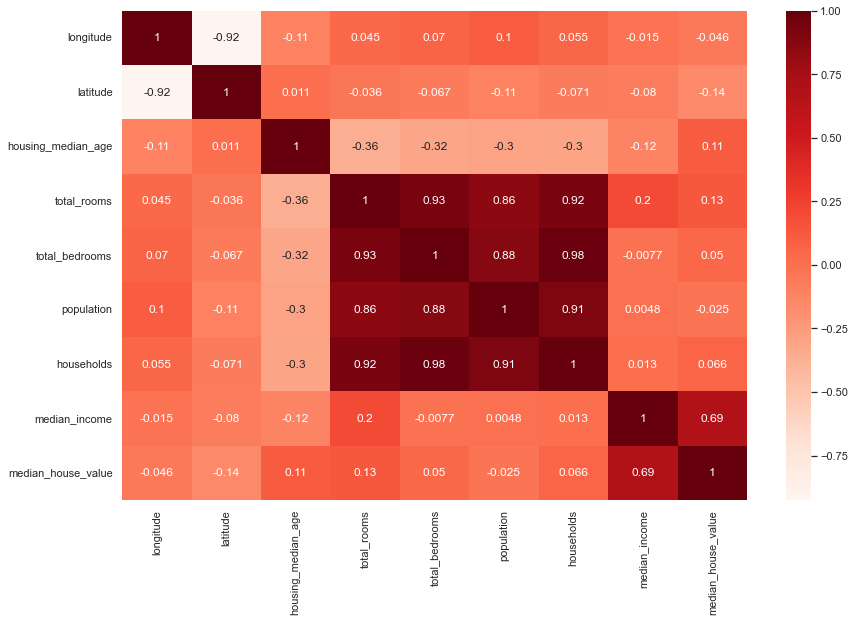

In [13]:
# Running the inbuilt corr method for pandas to check the covariance
matrix=house.corr()
plt.figure(figsize=(14,9))
sns.heatmap(matrix,cmap='Reds',annot=True)
plt.show()

# Calculating the 95% Confidence Interval

In [ ]:
 
print ("The pearson's correlation coefficient is")
scipy.stats.pearsonr(house.median_income, house.median_house_value)    # Pearson's r
# np.percentile([2.5,97.5]).round(3)




In [14]:
scipy.stats.spearmanr(X, Y)   # Spearman's rho

SpearmanrResult(correlation=0.6735900188858641, pvalue=3.484899436750377e-133)

In [16]:
# SpearmanrResult()
scipy.stats.kendalltau(X, Y)

KendalltauResult(correlation=0.4908638907562944, pvalue=4.0352569094050045e-119)

In [17]:
from scipy.stats import ttest_ind
import numpy as np

In [18]:
x = statistics.mean(X)
print(x)

3.8173674


In [ ]:
# X.describe

In [20]:
ttest,pval = ttest_ind(X,Y)
print("p-value is ",pval)

if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value is  0.0
we reject null hypothesis


In [23]:
#perfoming the weighted  normal test
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(X, x2=None, value=1000)
print("The p_value for this test is",float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

The p_value for this test is 0.0
reject null hypothesis


In [ ]:
ztest ,pval1 = stests.ztest(X, x2=Y, value=0,alternative='two-sided')
print(float(pval1))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

Text(0.5, 0.98, 'Median Income vs Median Value')

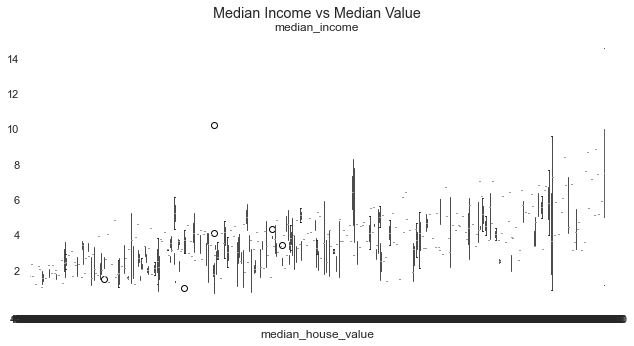

In [24]:
data.boxplot(column='median_income', by = 'median_house_value') 
plt.suptitle("Median Income vs Median Value")

In [29]:
# import numpy as np
import scipy.stats as st
  
# # define sample data
# gfg_data = [X,Y]
  
# # create 99% confidence interval
# st.t.interval(alpha=0.99,
#               df=len(gfg_data)-1,
#               loc=np.mean(gfg_data), 
#               scale=st.sem(gfg_data))

In [30]:
# define sample data
gfg_data = np.random.randint(X)
  
# create 90% confidence interval
# for population mean weight
st.norm.interval(alpha=0.90,
                 loc=np.mean(gfg_data),
                 scale=st.sem(gfg_data))

(-9248829.598134039, 1743292.4661340355)

In [ ]:

# generate random data
# create lineplot
# ax = sns.lineplot(X, Y)

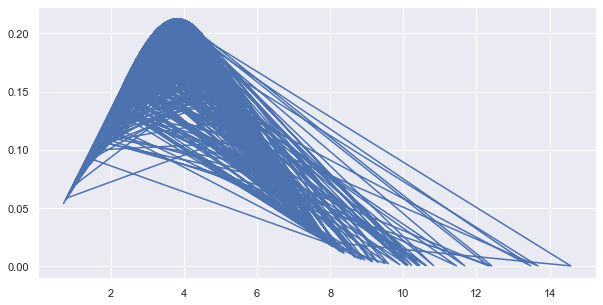

In [31]:
# x_axis = (X)
  
# # Calculating mean and standard deviation
# # mean = statistics.mean(x_axis)
# sd = statistics.stdev(x_axis)
  
# plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
# plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


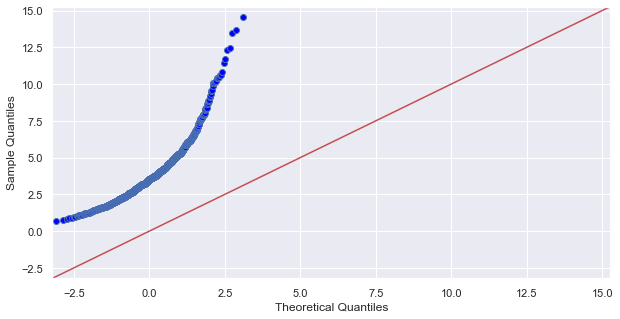

In [32]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(X, line='45')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


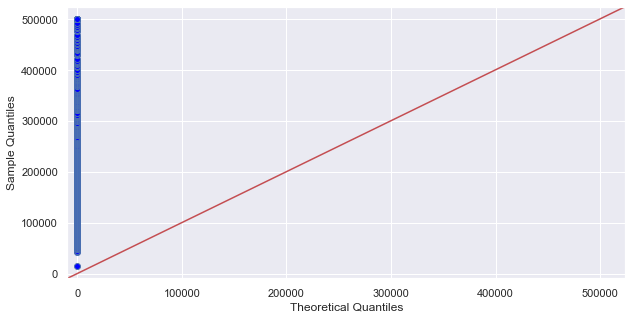

In [33]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(Y, line='45')
plt.show()
